In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Input
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Conv2DTranspose, concatenate, merge, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
import keras.layers.advanced_activations
from keras.models import Model
import pandas as pd
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.preprocessing import image
import pandas as pd
import numpy as np
from scipy.misc import imresize
import glob
import os
from PIL import Image
from keras.applications.vgg16 import VGG16
from keras.optimizers import RMSprop
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_ph ='/content/drive/MyDrive/TRUC/CUHK/photos/'
path_sk ='/content/drive/MyDrive/TRUC/CUHK/sketches/'

In [ ]:
photos, sketches = [], []

path_photos = os.listdir(path_ph)
path_photos.sort()
path_sketches = os.listdir(path_sk)
path_sketches.sort()
images = [path_ph + photo for photo in path_photos]
sketches = [path_sk + sketch for sketch in path_sketches]

In [ ]:
sketch_img=[]
photo_img=[]
for i in range(len((images))):
    path1=sketches[i]
    path2=images[i]
    
    temp_img1=image.load_img(path1,target_size=(128,128,3))
    temp_img2=image.load_img(path2,target_size=(128,128,3))
    temp_img1=image.img_to_array(temp_img1)
    
    temp_img2=image.img_to_array(temp_img2)

    sketch_img.append(temp_img1)
    photo_img.append(temp_img2)

sketch_img=np.array(sketch_img) 
photo_img=np.array(photo_img) 

sketch_img=sketch_img.astype('float32')

mean = np.mean(sketch_img)
std = np.std(sketch_img)
#sketch_img-=mean
#sketch_img/=std
#sketch_img-=128
#sketch_img/=128
photo_img=np.array(photo_img) 
photo_img=photo_img.astype('float32')

#sketch_img=(sketch_img.astype(np.float32)/255
#photo_img=(photo_img.astype(np.float32)/255            
sketch_img=(sketch_img.astype(np.float32)-127.5)/127.5
photo_img=(photo_img.astype(np.float32)-127.5)/127.5

In [ ]:
from keras.layers.advanced_activations import LeakyReLU, PReLU
def generator():


    input_shape=((128,128,3))
    img_rows,img_cols=128,128

    inputs = Input((img_rows,img_cols,3))
    conv1 = Conv2D(32, (7,7), strides=(1,1) ,padding="same")(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation("relu")(conv1)
    
    conv2 = Conv2D(64, (3,3), strides=(2,2),padding="same" )(conv1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation("relu")(conv2)
    
    conv3 = Conv2D(128, (3,3), strides=(2,2),padding="same")(conv2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation("relu")(conv3)
    
    b1 = Conv2D(128, (3,3), padding="same")(conv3)
    b1 = BatchNormalization()(b1)
    b1 = Activation("relu")(b1)
    b2 = Conv2D(128, (3,3), padding="same")(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation("relu")(b2)
    block1 = keras.layers.add([b1,b2])
    
    b1 = Conv2D(128, (3,3), padding="same")(block1)
    b1 = BatchNormalization()(b1)
    b1 = Activation("relu")(b1)
    b2 = Conv2D(128, (3,3), padding="same")(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation("relu")(b2)
    block2 = keras.layers.add([b1,b2])
    
    b1= Conv2D(128, (3,3), padding="same")(block2)
    b1 = BatchNormalization()(b1)
    b1 = Activation("relu")(b1)
    b2 = Conv2D(128, (3,3), padding="same")(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation("relu")(b2)
    block3 = keras.layers.add([b1,b2])
    
    b1 = Conv2D(128, (3,3), padding="same")(block3)
    b1 = BatchNormalization()(b1)
    b1 = Activation("relu")(b1)
    b2 = Conv2D(128, (3,3), padding="same")(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation("relu")(b2)
    block4 = keras.layers.add([b1,b2])
    
    b1 = Conv2D(128, (3,3), padding="same")(block4)
    b1 = BatchNormalization()(b1)
    b1 = Activation("relu")(b1)
    b2 = Conv2D(128, (3,3), padding="same")(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation("relu")(b2)
    block5 = keras.layers.add([b1,b2])
    
    b1 = Conv2D(128, (3,3), padding="same")(block5)
    b1 = BatchNormalization()(b1)
    b1 = Activation("relu")(b1)
    b2 = Conv2D(128, (3,3), padding="same")(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation("relu")(b2)
    block6 = keras.layers.add([b1,b2])

    u1 = Conv2DTranspose(64, (3,3), strides=(2, 2),padding="same")(block6)
    u1 = BatchNormalization()(u1)
    u1 = Activation("relu")(u1)
    
    u2 = Conv2DTranspose(32, (3,3), strides=(2, 2),padding="same")(u1)
    u2 = BatchNormalization()(u2)
    u2 = Activation("relu")(u2)
    
    conv4 = Conv2D(3, (3,3), strides=(1,1),padding="same" )(u2)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation("relu")(conv4)
    
    model = Model(inputs=[inputs], outputs=[conv4])
    return model

In [ ]:
from keras.layers.advanced_activations import LeakyReLU, PReLU
def discriminator():
    
    inputs = Input((128,128,3))
    conv1 = Conv2D(64, (4,4), strides=(2,2) )(inputs)
    conv1 = Activation(LeakyReLU(alpha=.2))(conv1)

    conv2 = Conv2D(128, (4,4), strides=(2,2) )(conv1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation(LeakyReLU(alpha=.2))(conv2)

    conv3 = Conv2D(256, (4,4), strides=(2,2) )(conv2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation(LeakyReLU(alpha=.2))(conv3)
    
    conv4 = Conv2D(512, (4,4), strides=(2,2) )(conv3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation(LeakyReLU(alpha=.2))(conv4)
    
    out = Flatten()(conv4)
    out = Dense(1, activation='sigmoid')(out)
    
    model = Model(inputs=[inputs], outputs=[out])
    
    return model

In [ ]:
def full_model(g,d):
    inputs = Input((128,128,3))
    x_generator = g(inputs)
    
    #merged = concatenate([inputs, x_generator],axis=0)
    #merged = merge([inputs, x_generator], mode='concat',concat_axis=0)
    d.trainable = False
    x_discriminator = d(x_generator)
    
    model = Model(inputs=inputs, outputs=[x_generator,x_discriminator])
    
    return model

In [ ]:
def num_patches(output_img_dim = (3, 256, 256), sub_patch_dim =(64, 64)):
    nb_non_overlapping_patches =  (output_img_dim[1] / sub_patch_dim[0]) * (output_img_dim[2] / sub_patch_dim[1])
    patch_disc_img_dim = (output_img_dim[0], sub_patch_dim[0], sub_patch_dim[1])
    return int(nb_non_overlapping_patches), patch_disc_img_dim

In [ ]:
num_epochs=30
batch_size=30
optimizer = RMSprop(lr=0.00005)
from keras import backend as K
smooth = 1.
def discriminator_loss(y_true,y_pred):
    BATCH_SIZE=30
    return K.mean(K.binary_crossentropy(K.flatten(y_pred), K.concatenate([K.ones_like(K.flatten(y_pred[:BATCH_SIZE])),K.zeros_like(K.flatten(y_pred[:BATCH_SIZE])) ]) ), axis=-1)

def discriminator_on_generator_loss(y_true,y_pred):
    BATCH_SIZE=30
    return K.mean(K.binary_crossentropy(K.flatten(y_pred), K.ones_like(K.flatten(y_pred))), axis=-1)

def generator_l1_loss(y_true,y_pred):
    BATCH_SIZE=30
    return K.mean(K.abs(K.flatten(y_pred) - K.flatten(y_true)), axis=-1)

def least_absolute_error(y_true, y_pred):
    return (K.abs(y_pred - y_true))

def wasserstein_loss(y_true, y_pred):
    return K.mean(y_true * y_pred)

def mean_squared_error(y_true, y_pred):
    return 10*K.mean(K.square(y_pred - y_true), axis=-1)

optim=keras.optimizers.Adam(lr=0.0002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

g=generator()
d=discriminator()
d_on_g = full_model(g, d)

g.compile(loss=mean_squared_error,optimizer=optim)
d.compile(loss=discriminator_loss,optimizer=optim)

d_on_g.compile(loss=[mean_squared_error,discriminator_on_generator_loss],optimizer=optim)
d.trainable = True

In [ ]:

import cv2 as cv
import matplotlib.pyplot as plt
'''temp_img1=image.load_img("test.jpg",target_size=(128,128,3))
temp_img1=image.img_to_array(temp_img1)
a=np.zeros((1,128,128,3))
temp_img1=(temp_img1.astype(np.float32)-127.5)/127.5
a[0]=temp_img1.astype(np.float32)'''

def imshow(x, gray=False):
    plt.imshow(x)
    plt.show()


for epoch in range(200):
    print "\nEpoch number : %d" %epoch
    
    if epoch >= 0:
        g.optimizer.lr.assign(0.0002* 1/(1 + 0.001 * epoch))
        d.optimizer.lr.assign(0.0002* 1/(1 + 0.001 * epoch))
    
    '''if epoch<=3:
        temp_loss=g.fit(sketch_img,photo_img)'''
    for batch in range(sketch_img.shape[0]//batch_size):
        X = sketch_img[batch*batch_size:(batch+1)*(batch_size)]
        Y = photo_img[batch*batch_size:(batch+1)*(batch_size)]
        generated_images=g.predict(X,verbose=0)
        #print generated_images.shape
          

        discriminator_Y = [1] * batch_size + [0] * batch_size
        discriminator_X = np.concatenate((Y,generated_images), axis=0)
        discriminator_X=discriminator_X*127.5+127.5
        #discriminator_X=discriminator_X*255
        #discriminator_X=discriminator_X*127.5+127.5
        '''discriminator_Y=np.asarray(discriminator_Y)
        discriminator_Y=pd.get_dummies(discriminator_Y)'''
        discriminator_Y=np.array(discriminator_Y)

        d.trainable=True
        for i in range(1):
            d_loss=d.train_on_batch(discriminator_X, discriminator_Y)
        d.trainable=False
        for i in range(1):
            label_y=discriminator_Y[:batch_size]
            g_loss = d_on_g.train_on_batch(X,[Y,label_y])
        
        
        d.trainable = True
        print("\tbatch %d g_loss: %f,%f  d_loss: %f "  %(batch, g_loss[0], g_loss[1], d_loss))


Epoch number : 0
	batch 0 g_loss: 13.743854,7.881585  d_loss: 9.649918 
	batch 1 g_loss: 13.254431,7.404938  d_loss: 9.358191 
	batch 2 g_loss: 10.221091,6.886598  d_loss: 9.868361 
	batch 3 g_loss: 10.220798,6.933430  d_loss: 10.028918 
	batch 4 g_loss: 10.136498,7.411702  d_loss: 9.576506 
	batch 5 g_loss: 8.481686,6.473849  d_loss: 9.733648 

Epoch number : 1
	batch 0 g_loss: 7.650331,7.165980  d_loss: 9.608262 
	batch 1 g_loss: 6.798796,6.490015  d_loss: 9.388232 
	batch 2 g_loss: 6.104307,5.905057  d_loss: 9.912998 
	batch 3 g_loss: 6.183843,6.016065  d_loss: 10.105121 
	batch 4 g_loss: 6.500385,6.346098  d_loss: 9.646497 
	batch 5 g_loss: 5.477833,5.333512  d_loss: 9.818862 

Epoch number : 2
	batch 0 g_loss: 6.006577,5.859862  d_loss: 9.667571 
	batch 1 g_loss: 5.205004,5.063074  d_loss: 9.480505 
	batch 2 g_loss: 4.578856,4.520165  d_loss: 10.000715 
	batch 3 g_loss: 4.772488,4.679471  d_loss: 10.183935 
	batch 4 g_loss: 4.911494,4.803956  d_loss: 9.740383 
	batch 5 g_loss: 4.

W1019 21:18:37.118175 140041557649280 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


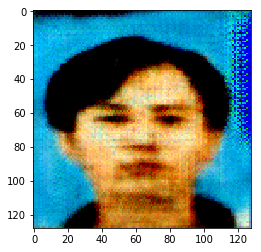

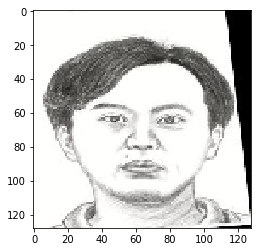

W1019 21:18:37.530925 140041557649280 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


###################################


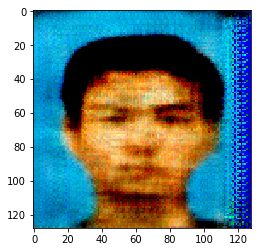

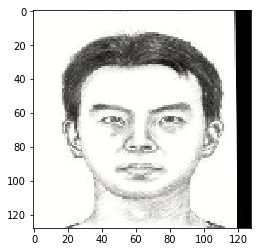

W1019 21:18:37.967881 140041557649280 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


###################################


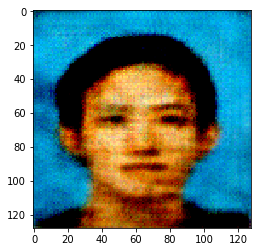

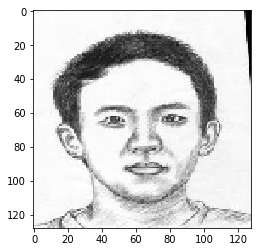

W1019 21:18:38.399399 140041557649280 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


###################################


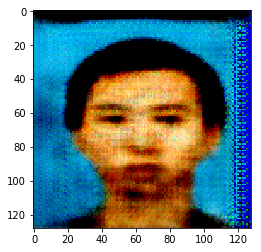

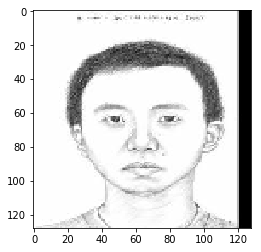

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
def imshow(x ,gray=False):
    plt.imshow(x)
    plt.show()

temp_img=image.load_img("/content/drive/MyDrive/TRUC/CUHK/sketches/sketch (80).jpg",target_size=(128,128,3))
temp_img1=image.img_to_array(temp_img)
a=np.zeros((1,128,128,3))
temp_img1=(temp_img1.astype(np.float32)-127.5)/127.5
a[0]=temp_img1.astype(np.float32)
result= g.predict(a)
#result=result*127.5+127.5
imshow(result[0])
imshow(temp_img)

print "###################################"

temp_img=image.load_img("/content/drive/MyDrive/TRUC/CUHK/sketches/sketch (96).jpg",target_size=(128,128,3))
temp_img1=image.img_to_array(temp_img)
a=np.zeros((1,128,128,3))
temp_img1=(temp_img1.astype(np.float32)-127.5)/127.5
a[0]=temp_img1.astype(np.float32)
result= g.predict(a)
#result=result*127.5+127.5
imshow(result[0])
imshow(temp_img)

print "###################################"

temp_img=image.load_img("/content/drive/MyDrive/TRUC/CUHK/sketches/sketch (43).jpg",target_size=(128,128,3))
temp_img1=image.img_to_array(temp_img)
a=np.zeros((1,128,128,3))
temp_img1=(temp_img1.astype(np.float32)-127.5)/127.5
a[0]=temp_img1.astype(np.float32)
result= g.predict(a)
#result=result*127.5+127.5
imshow(result[0])
imshow(temp_img)

print "###################################"

temp_img=image.load_img("/content/drive/MyDrive/TRUC/CUHK/sketches/sketch (185).jpg",target_size=(128,128,3))
temp_img1=image.img_to_array(temp_img)
a=np.zeros((1,128,128,3))
temp_img1=(temp_img1.astype(np.float32)-127.5)/127.5
a[0]=temp_img1.astype(np.float32)
result= g.predict(a)
#result=result*127.5+127.5
imshow(result[0])
imshow(temp_img)

In [ ]:
g.save('generator.h5')

In [ ]:
g.save('/content/drive/MyDrive/TRUC/generator.h5')